# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Initial imports
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

# Plot inline
%matplotlib inline

In [2]:
# Load the environment variables from the .env file
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio
btc_coins = 1.2
eth_coins = 5.3

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [ ]:
# Make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Review the response data from the API call
print(json.dumps(btc_response, indent = 4, sort_keys = True))

In [ ]:
# Make an API call to access the current price of ETH
eth_response = requests.get(eth_url).json()

# Review the response data from the API call
print(json.dumps(eth_response, indent = 4, sort_keys = True))

In [12]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
print(f"The current price of Bitcoin is ${btc_price:.0f}")

The current price of Bitcoin is $21158


In [11]:
# Navigate the ETH response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
print(f"The current price of Ethereum is ${eth_price:.0f}")

The current price of Ethereum is $1160


In [14]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of the holding in BTC
print(f"The value of the Bitcoin holding is ${btc_value:.2f}")

The value of the BTC holding is $25389.60


In [15]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of the holding in ETH
print(f"The value of the Ethereum holding is ${eth_value:.2f}")

The value of the Ethereum holding is $6146.20


In [16]:
# Compute the total value of the cryptocurrency wallet
total_crypto_wallet = btc_value + eth_value

# Print the current cryptocurrency wallet balance
print(f"The current value of the entire crypto wallet is ${total_crypto_wallet:.2f}")

The current value of the entire crypto wallet is $31535.80


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In [17]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio
spy_shares = 110
agg_shares = 200

In [23]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "V2"
)

In [36]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1Day
timeframe = "1Day"

# Set the start and end date
start_date = pd.Timestamp("2022-06-23", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-06-23", tz="America/New_York").isoformat()


In [37]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Use .head() to verify
prices_df.head()

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2022-06-23 04:00:00+00:00  376.69  378.83  372.89  378.06  78643521   

                                                      AGG                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2022-06-23 04:00:00+00:00      623105  376.219755  101.25  101.76  101.125   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-06-23 04:00:00+00:00  101.21  7760715       25697  101.363615

In [38]:
# Access the closing price for AGG from the Alpaca DataFrame and convert to float
agg_close_price = float(prices_df["AGG"]["close"])

# Print the AGG closing price
print(f"The closing price of AGG is ${agg_close_price:.2f}")


The closing price of AGG is $101.21


In [39]:
# Access the closing price for SPY from the Alpaca DataFrame and convert to float
spy_close_price = float(prices_df["SPY"]["close"])

# Print the SPY closing price
print(f"The closing price of SPY is ${spy_close_price:.2f}")

The closing price of SPY is $378.06


In [40]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(f"The current value of the bond portfolio is ${agg_value:.2f}")

The current value of the bond portfolio is $20242.00


In [41]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
print(f"The current value of the stock portfolio is ${spy_value:.2f}")

The current value of the stock portfolio is $41586.60


In [42]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = spy_value + agg_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"The total value of the stock & bond portion of the portfolio is ${total_stocks_bonds:.2f}")

The total value of the stock & bond portion of the portfolio is $61828.60


In [43]:
# Calculate the total value of the member's entire savings portfolio
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print the total value of the member's entire savings portfolio
print(f"The value of the entire portfolio is ${total_portfolio:.2f}")

The value of the entire portfolio is $93364.40


### Evaluate the Emergency Fund

In [44]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
print(savings_data)    

[31535.798, 61828.6]


In [45]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(
    savings_data,
    columns = ["amount"],
    index = ["crypto", "stock/bond"]
)

# Display the savings_df DataFrame
savings_df

,amount
crypto,31535.798
stock/bond,61828.600


<AxesSubplot:title={'center':'Breakdown of Savings Portfolio'}, ylabel='amount'>

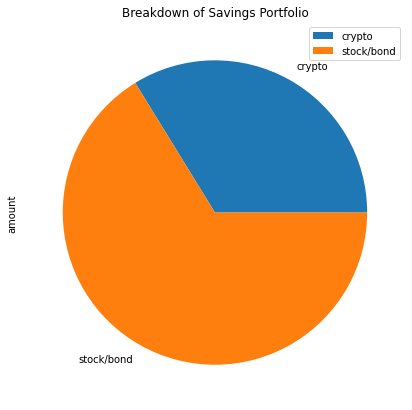

In [48]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(title="Breakdown of Savings Portfolio", figsize=(10, 7), y="amount")

In [49]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3

In [50]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
emergency_fund_difference = emergency_fund_value - total_portfolio

if total_portfolio > emergency_fund_value:
    print("Congratulations! You have more than enough savings to fund your emergency portfolio!")
elif total_portfolio == emergency_fund_value:
    print("Congratulations! You've reached an important financial goal and have enough funds for your emergency portfolio.")
else:
    print(f"Almost there! Looks like you are ${emergency_fund_difference} away from being able to fund your emergency portfolio")

Congratulations! You have more than enough savings to fund your emergency portfolio!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [ ]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
# YOUR CODE HERE
# YOUR CODE HERE

In [ ]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
# YOUR CODE HERE

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE

# Concatenate the ticker DataFrames
# YOUR CODE HERE

# Display both the first and last five rows of the DataFrame
# YOUR CODE HERE
# YOUR CODE HERE


#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [ ]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# YOUR CODE HERE

# Review the simulation input data
# YOUR CODE HERE


In [ ]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE


In [ ]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

In [ ]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [ ]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE


# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE


In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = # YOUR CODE HERE
ci_upper_thirty_cumulative_return = # YOUR CODE HERE

# Print the result of your calculations
# YOUR CODE HERE


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [ ]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE

# Review the simulation input data
# YOUR CODE HERE


In [ ]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE


In [ ]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE


In [ ]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE


In [ ]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE


# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE


In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = # YOUR CODE HERE
ci_upper_ten_cumulative_return = # YOUR CODE HERE

# Print the result of your calculations
# YOUR CODE HERE


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?